# 2022F-BSE-014

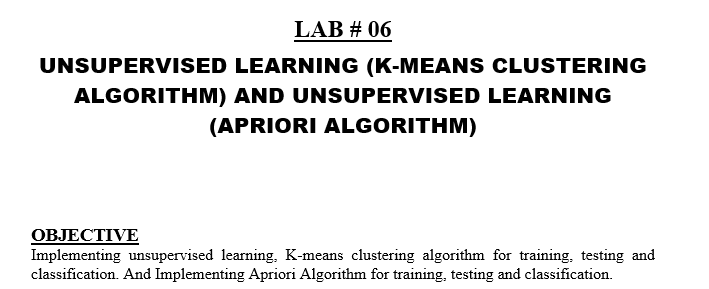

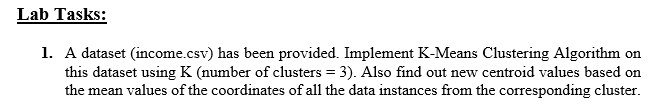

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv("income.csv")
print(df)

   ID  Age  Income
0   1   25   50000
1   2   30   60000
2   3   35   70000
3   4   40   80000
4   5   45   90000
5   6   22   30000
6   7   27   40000
7   8   32   75000
8   9   37   85000
9  10   29   45000


In [4]:
km = KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income']])
print(y_predicted)

[1 1 0 0 0 2 1 0 0 1]


In [6]:
df['cluster'] = y_predicted
print(km.cluster_centers_)

[[3.780e+01 8.000e+04]
 [2.775e+01 4.875e+04]
 [2.200e+01 3.000e+04]]


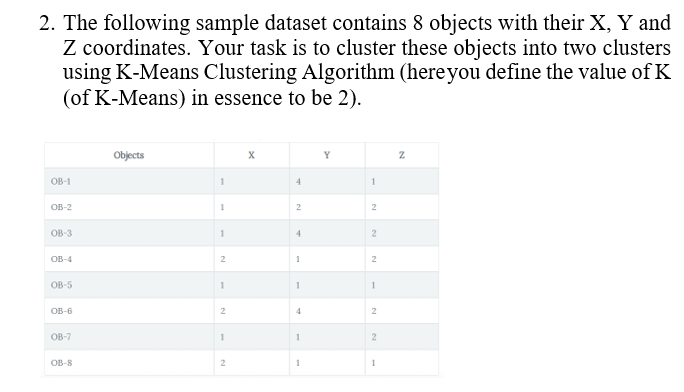

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [10]:
df = pd.read_csv("objects_dataset.csv")
print(df)

   Objects  X  Y  Z
0        1  1  4  1
1        2  1  2  2
2        3  1  4  1
3        4  2  1  2
4        5  1  1  1
5        6  2  4  2
6        7  1  1  2
7        8  2  1  1


In [11]:
km = KMeans(n_clusters=2)

In [13]:
y_predicted = km.fit_predict(df[['Objects','X','Y','Z']])
print(y_predicted)

[1 1 1 1 0 0 0 0]


In [14]:
df['cluster'] = y_predicted

In [15]:
print(km.cluster_centers_)

[[6.5  1.5  1.75 1.5 ]
 [2.5  1.25 2.75 1.5 ]]


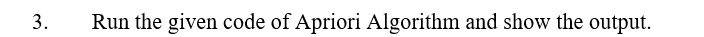

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
df = pd.read_excel("Online_Retail.xlsx")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [6]:
df['Description'] = df["Description"].str.strip()
df.dropna(axis=0,subset=["InvoiceNo"],inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains("C")]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
basket = (df[df['Country'] =="France"]
.groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))


In [13]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop("POSTAGE",inplace=True,axis=1)
print(basket_sets.head())

C:\Users\DC\AppData\Local\Temp\ipykernel_8768\2529323523.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   

Desc

In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets,'num_itemsets', metric="lift", min_threshold=1)
print(rules.head())

                    antecedents                   consequents  \
0   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
2  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
3    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
4   (ALARM CLOCK BAKELIKE PINK)    (ALARM CLOCK BAKELIKE RED)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.102041            0.096939  0.073980    0.725000  7.478947   
1            0.096939            0.102041  0.073980    0.763158  7.478947   
2            0.096939            0.094388  0.079082    0.815789  8.642959   
3            0.094388            0.096939  0.079082    0.837838  8.642959   
4            0.102041            0.094388  0.073980    0.725000  7.681081   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.064088    3.283859       0.964734  0.59183

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
rules[ (rules['lift'] >= 6) &
(rules['confidence'] >= 0.8) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,1.0,0.085121,4.336735,0.956140,0.645161,0.769412,0.784615
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,1.0,0.104878,21.556122,0.981725,0.857143,0.953609,0.924444
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,1.0,0.104878,7.852041,0.993343,0.857143,0.872645,0.924444
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,1.0,0.085433,34.489796,0.956294,0.709091,0.971006,0.848611
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,1.0,0.083247,4.625850,0.953488,0.639344,0.783824,0.781250
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,1.0,0.086474,34.897959,0.967949,0.764706,0.971345,0.877500


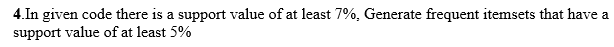

In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [18]:
df = pd.read_excel('Online_Retail.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [19]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [21]:
basket = (df[df['Country'] =="France"]
.groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

In [22]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
print(basket_sets)

C:\Users\DC\AppData\Local\Temp\ipykernel_8768\1162239836.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   
...                             ...                         ...   
580986                            0                           0   
581001                            0                           0   
581171                            0                           0   
581279                            0                           0   
581587                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                            

In [26]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets,'num_itemsets', metric="lift", min_threshold=1)
print(rules.head())

                    antecedents                   consequents  \
0   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
2  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
3    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
4   (ALARM CLOCK BAKELIKE PINK)    (ALARM CLOCK BAKELIKE RED)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.102041            0.096939  0.073980    0.725000  7.478947   
1            0.096939            0.102041  0.073980    0.763158  7.478947   
2            0.096939            0.094388  0.079082    0.815789  8.642959   
3            0.094388            0.096939  0.079082    0.837838  8.642959   
4            0.102041            0.094388  0.073980    0.725000  7.681081   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.064088    3.283859       0.964734  0.59183

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [28]:
print(rules[ (rules['lift'] >= 6) &
(rules['confidence'] >= 0.8) ])

                                          antecedents  \
2                        (ALARM CLOCK BAKELIKE GREEN)   
3                          (ALARM CLOCK BAKELIKE RED)   
8                      (CHILDRENS CUTLERY DOLLY GIRL)   
9                        (CHILDRENS CUTLERY SPACEBOY)   
38                     (PACK OF 6 SKULL PAPER PLATES)   
39                       (PACK OF 6 SKULL PAPER CUPS)   
65                    (SET/6 RED SPOTTY PAPER PLATES)   
66                    (SET/6 RED SPOTTY PAPER PLATES)   
67                      (SET/6 RED SPOTTY PAPER CUPS)   
68  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...   
69  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...   
70  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...   
80  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
81  (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...   
82  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                             consequents  antecedent support  \
2             (ALARM CL

# Home Task (K Mean clustering)

In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [34]:
df = pd.read_csv('Height_Weight_Dataset.csv')
print(df)

   Height (cm)  Weight (kg)
0          160           55
1          170           65
2          180           75
3          165           60
4          175           70
5          155           50
6          185           80
7          168           68
8          172           72


In [35]:
km = KMeans(n_clusters=3)

In [37]:
y_predicted = km.fit_predict(df[[ 'Height (cm)','Weight (kg)']])
print(y_predicted)

[0 2 1 2 2 0 1 2 2]


In [38]:
df['cluster'] = y_predicted
print(km.cluster_centers_)

[[157.5  52.5]
 [182.5  77.5]
 [170.   67. ]]
